# Logistic Regression
* 분류

In [2]:
import numpy as np

z = np.arange(-10, 10, 0.01)
g = 1 / (1+np.exp(-z))

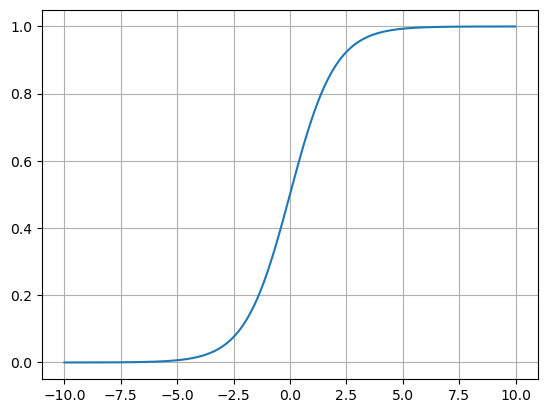

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

plt.plot(z, g)
plt.grid()
plt.show()

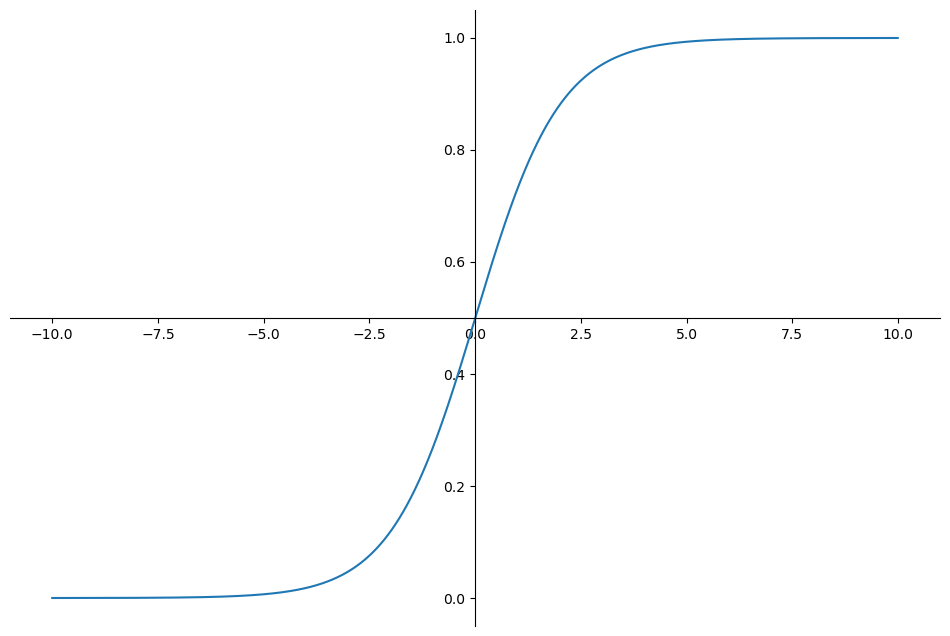

In [6]:
# graph detail

plt.figure(figsize=(12, 8))
ax = plt.gca()  # gca: axis 설정값 변경할 수 있음

ax.plot(z, g)

# 축 설정
ax.spines['left'].set_position('zero')  # 
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')

plt.show()

* Hypothesis 함수의 결과에 따른 분류
* Decision Boundary

#### Logistic Reg의 Cost Function의 그래프

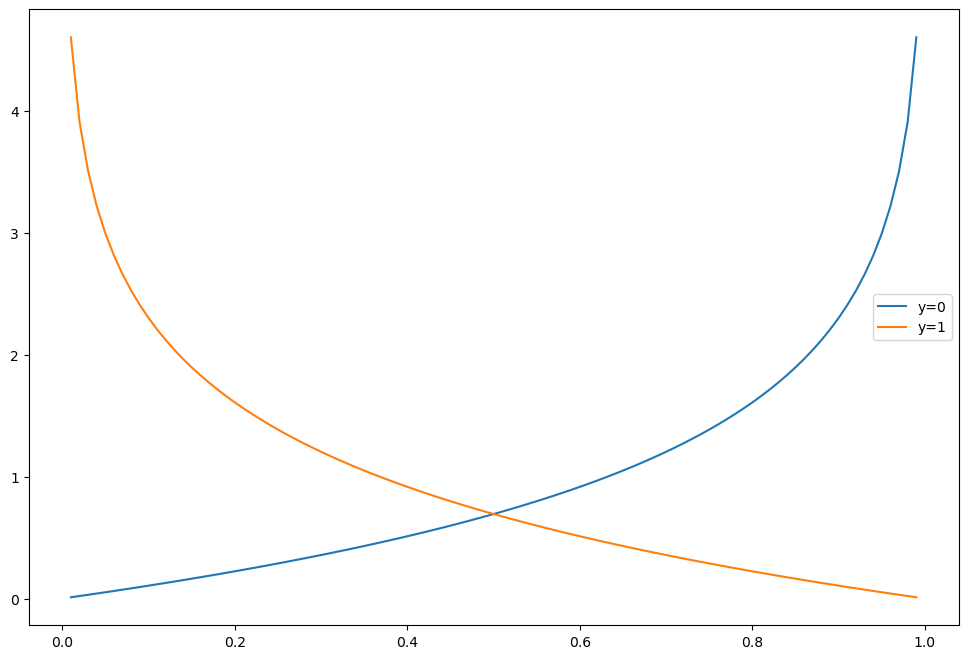

In [11]:
h = np.arange(0.01, 1, 0.01)

C0 = -np.log(1-h)
C1 = -np.log(h)

plt.figure(figsize=(12, 8))
plt.plot(h, C0, label='y=0')
plt.plot(h, C1, label='y=1')
plt.legend()
#plt.grid()

plt.show()

## 실습

In [12]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [13]:
# 맛 등급 만들어 넣기
wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

* 데이터 분리

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

* 간단 로지스틱 회귀 테스트

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

LogisticRegression(random_state=13, solver='liblinear')

In [18]:
y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7427361939580527
Test Acc:  0.7438461538461538


* 스케일러까지 적용해서 파이프라인 구축
* cf. DT는 스케일러의 영향 크게 받지 않음

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', LogisticRegression(solver='liblinear', random_state=13))]

pipe = Pipeline(estimators)

In [20]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [21]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7444679622859341
Test Acc:  0.7469230769230769


--> scaler에 의한 변화 쪼금 생김

* DT와 비교를 위한 작업

In [22]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

In [23]:
models = {
    'logistic regression': pipe,  # logistic regression 은 scaler 있는 게 성능 쫌 더 좋았음
    'decision tree': wine_tree    # decision tree 는 scaler 영향 덜 받음
}

* AUC 그려서 비교

In [24]:
from sklearn.metrics import roc_curve

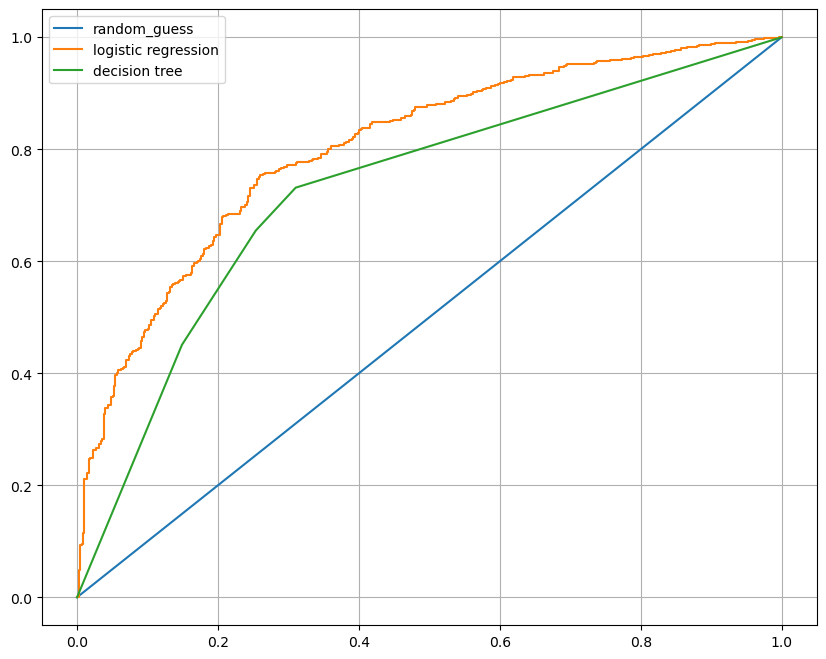

In [30]:
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], label='random_guess')

for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:, 1]  # 첫 번째 column: 0일 확률, 두 번째 column: 1일 확률이므로 두 번째 column 가져오기
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    
    plt.plot(fpr, tpr, label=model_name)

plt.grid()
plt.legend()
plt.show()

--> logistic이 성능 더 좋은 것 확인

### PIMA 인디언 당뇨병 예측

In [31]:
PIMA_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'

PIMA = pd.read_csv(PIMA_url)

In [32]:
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* float 로 데이터 변환

In [34]:
PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


* 상관관계 확인

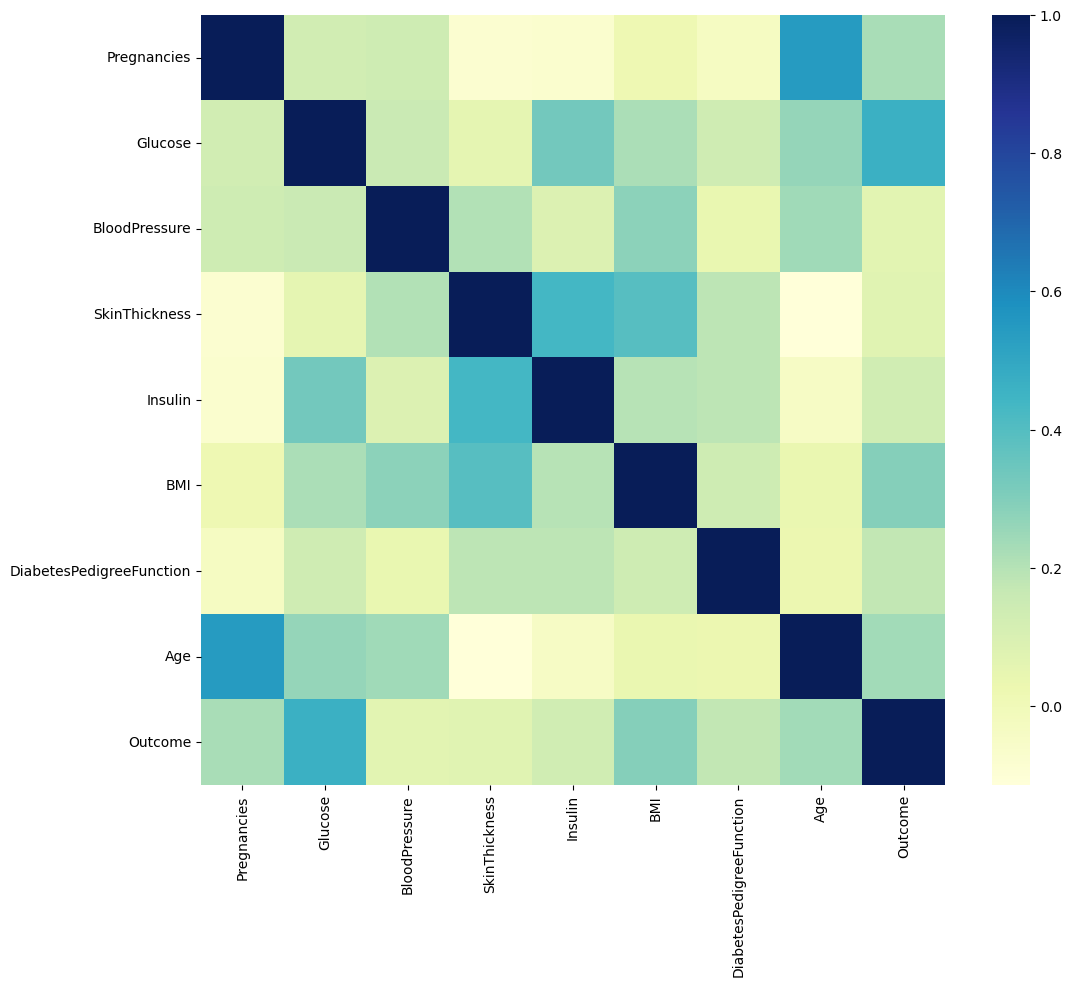

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(PIMA.corr(), cmap='YlGnBu')  # yello green blue
plt.show()

* 결측치 확인

In [36]:
(PIMA==0).astype(int).sum()  # column별 0 갯수

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

* 결측치 -> 0으로 대체

In [37]:
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean())

In [38]:
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

* 데이터 나누기

In [39]:
X = PIMA.drop(['Outcome'], axis=1)
y = PIMA['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  
                                                    stratify = y,
                                                    random_state=13
)

* pipeline

In [40]:
estimators = [
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(solver='liblinear', random_state=13))
]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

* 수치 확인

In [41]:
from sklearn.metrics import (accuracy_score, recall_score, precision_score, roc_auc_score, f1_score)

print('Accuracy: ', accuracy_score(y_test, pred))
print('Recall: ', recall_score(y_test, pred))
print('Precision: ', precision_score(y_test, pred))
print('AUC score: ', roc_auc_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))

Accuracy:  0.7727272727272727
Recall:  0.6111111111111112
Precision:  0.7021276595744681
AUC score:  0.7355555555555556
f1 score:  0.6534653465346535


* 다변수 방정식의 각 계수 값 확인

In [42]:
coeff = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)

In [43]:
coeff

[0.3542658884412649,
 1.2014244425037581,
 -0.15840135536286706,
 0.03394657712929965,
 -0.1628647195398813,
 0.620404521989511,
 0.3666935579557874,
 0.17195965447035091]

* 중요 feature 그려보기

In [45]:
features = pd.DataFrame({'Features':labels, 'importance':coeff})
features.sort_values(by=['importance'], ascending=True, inplace=True)
features

,Features,importance
4,Insulin,-0.162865
2,BloodPressure,-0.158401
3,SkinThickness,0.033947
7,Age,0.171960
0,Pregnancies,0.354266
6,DiabetesPedigreeFunction,0.366694
5,BMI,0.620405
1,Glucose,1.201424


In [46]:
features['positive'] = features['importance'] > 0
features

,Features,importance,positive
4,Insulin,-0.162865,False
2,BloodPressure,-0.158401,False
3,SkinThickness,0.033947,True
7,Age,0.171960,True
0,Pregnancies,0.354266,True
6,DiabetesPedigreeFunction,0.366694,True
5,BMI,0.620405,True
1,Glucose,1.201424,True


In [47]:
features.set_index('Features', inplace=True)
features

,importance,positive
Features,,
Insulin,-0.162865,False
BloodPressure,-0.158401,False
SkinThickness,0.033947,True
Age,0.171960,True
Pregnancies,0.354266,True
DiabetesPedigreeFunction,0.366694,True
BMI,0.620405,True
Glucose,1.201424,True


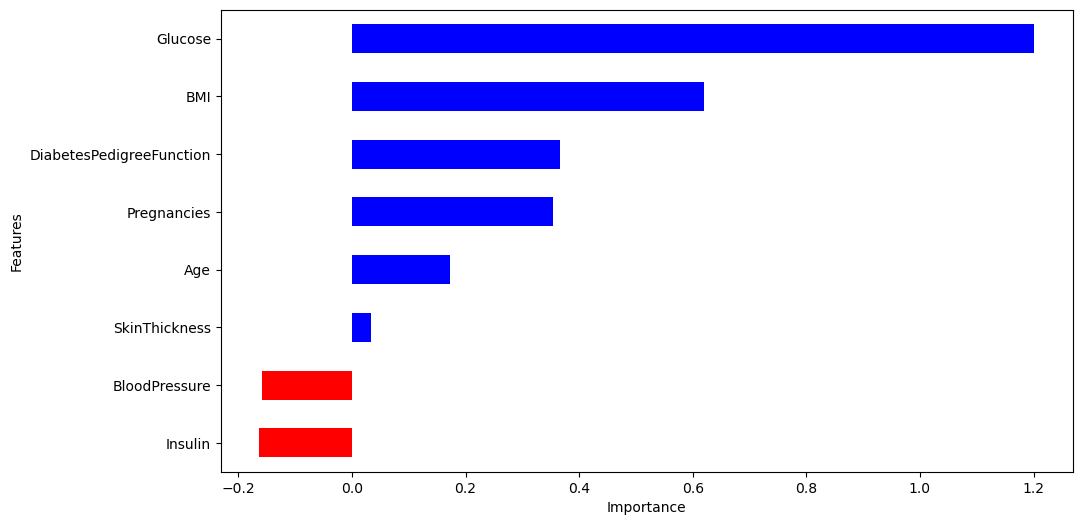

In [48]:
features['importance'].plot(kind='barh',
                            figsize=(11, 6),
                            color=features['positive'].map({True:'blue',
                                                            False:'red'}))
plt.xlabel('Importance')
plt.show()